In [1]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

from script.dataset import get_data
from script.visualization import pretty_str

plt.rcParams["figure.figsize"] = (12,9)

In [2]:
X, y = get_data(calibrated=False)

In [3]:
tsne = TSNE(2)
X_tsne = tsne.fit_transform(X)

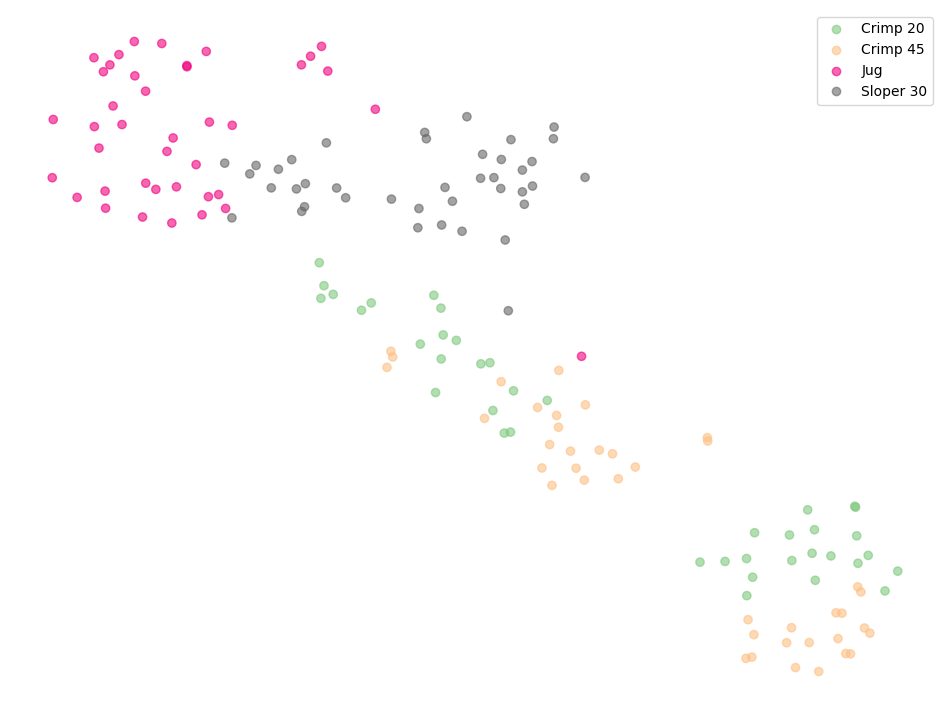

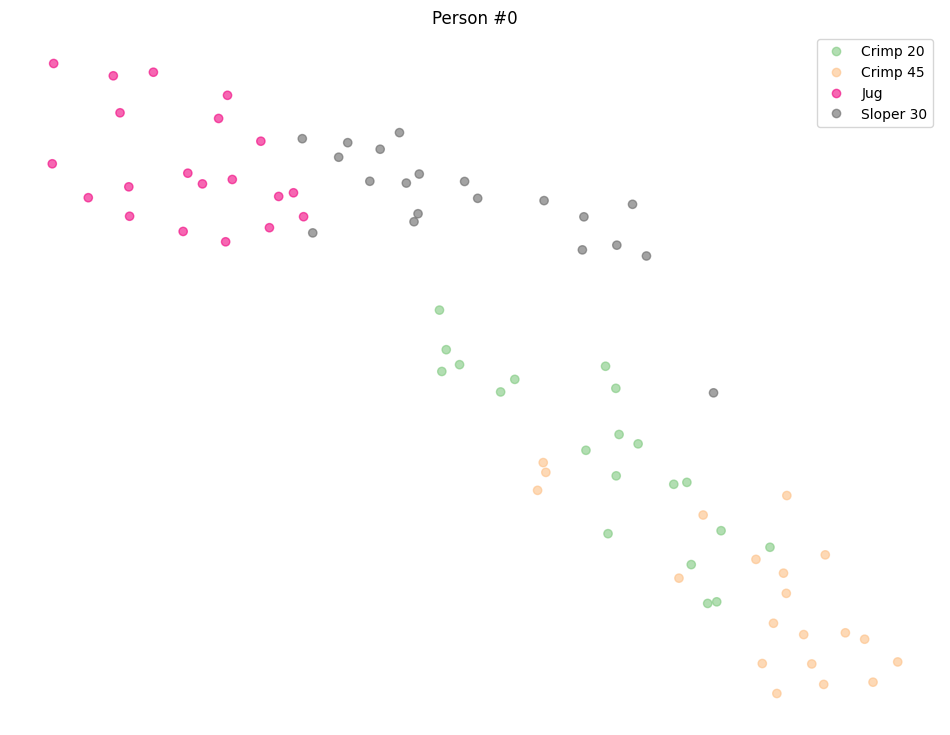

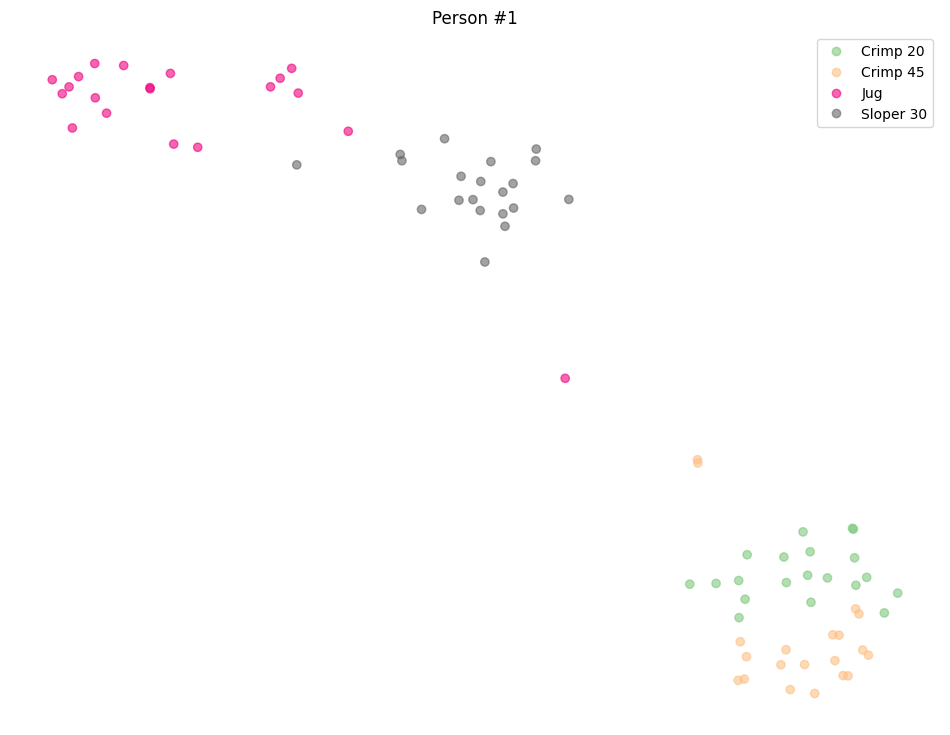

<Figure size 1200x900 with 0 Axes>

In [4]:
hold_labels = pd.Categorical(y['hold'])
person_labels = pd.Categorical(y['person'])

def _plot(condition, colors, title, save=False):
    plot = plt.scatter(
        X_tsne[condition,0], X_tsne[condition,1],
        c=colors.codes[condition],
        alpha=0.6, cmap='Accent')
    plt.legend(handles=plot.legend_elements()[0], labels=list(colors.categories))
    plt.title(title)
    plt.axis('off')
    if save:
        plt.savefig(f'{title}.png')
    else:
        plt.show()

_plot([True] * len(y), hold_labels, '')
plt.clf()
    
for p in person_labels.categories:
    _plot((y['person'] == p) & (~hold_labels.isna()), hold_labels, p)
    plt.clf()